## MARKOW CHAIN
- Node coordinates
- Random probabilities for which node to proceed to next
- Printing the path and distance
- Highlighting the traveled path with color and line thickness

In [1]:
# INIT
import networkx as nx
%matplotlib inline                     
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import random as rnd
import warnings                        
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
# CREATE A GRAPH
plt.rcParams["figure.figsize"] = [4,4] #[7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

DG1 = nx.DiGraph()                      # Directed graph
for x in range(0, 12):
    DG1.add_nodes_from([
     (x, {"color": "lightblue",  "node_color": "black",  }),
     ])
    
# Change the colors of the start node 0  and goal nodes 10 and 11.
DG1.nodes[0]['color']  = 'gold'
DG1.nodes[10]['color'] = 'lightgreen'
DG1.nodes[11]['color'] = 'hotpink'

#  Collecting attribute values into a dictionary
ncols = nx.get_node_attributes(DG1, 'color').values() 
#print(list(ncols))

# Node coordinates
ps = {0:(0,0), 1:(1,0.3),  2:(1,-0.3), 3:(2,0),\
               4:(3,0.3),  5:(3,-0.3), 6:(4,0),\
               7:(5,0.3),  8:(5,-0.3), 9:(6,0),\
              10:(7,0.3), 11:(7,-0.3),}

In [3]:
# Two edges come from each node. Let's draw the probabilities of which way the path will continue.
#p1 = round(rnd.random(),2) # Probability of going from node 0 to node 1
#p2 = 10 - p1            # Probability of going from node 0 to node 2
def prb():
    return round(rnd.random(),2)
p1 = prb()
p2 = round(1 - p1, 2)
DG1.add_edge(0, 1, weight = p1, color='k', width=1) # Edge atribute 'weight' is here probability.
DG1.add_edge(0, 2, weight = p2, color='k', width=1)
print(DG1[0][1]['weight'], DG1[0][2]['weight']) 
p1 = prb()
p2 = round(1 - p1, 2)
DG1.add_edge(1, 3, weight= p1, color='k', width=1)
DG1.add_edge(1, 4, weight= p2, color='k', width=1)
p1 = prb()
p2 = round(1 - p1, 2)
DG1.add_edge(2, 3, weight= p1, color='k', width=1)
DG1.add_edge(2, 5, weight= p2, color='k', width=1)
p1 = prb()
p2 = round(1 - p1, 2)
DG1.add_edge(3, 4, weight= p1, color='k', width=1)
DG1.add_edge(3, 5, weight= p2, color='k', width=1)
p1 = prb()
p2 = round(1 - p1, 2)
DG1.add_edge(4, 6, weight= p1, color='k', width=1)
DG1.add_edge(4, 7, weight= p2, color='k', width=1)
p1 = prb()
p2 = round(1 - p1, 2)
DG1.add_edge(5, 6, weight= p1, color='k', width=1)
DG1.add_edge(5, 8, weight= p2, color='k', width=1)
p1 = prb()
p2 = round(1 - p1, 2)
DG1.add_edge(6, 7, weight= p1, color='k', width=1)
DG1.add_edge(6, 8, weight= p2, color='k', width=1)
p1 = prb()
p2 = round(1 - p1, 2)
DG1.add_edge(7, 9, weight= p1, color='k', width=1)
DG1.add_edge(7, 10, weight=p2, color='k', width=1)
p1 = prb()
p2 = round(1 - p1, 2)
DG1.add_edge(8,  9, weight=p1, color='k', width=1)
DG1.add_edge(8, 11, weight=p2, color='k', width=1)
p1 = prb()
p2 = round(1 - p1, 2)
DG1.add_edge(9, 10, weight=p1, color='k', width=1)
DG1.add_edge(9, 11, weight=p2, color='k', width=1)

ecols = nx.get_edge_attributes(DG1, 'color').values() # Colors as a list of dictionary values
edge_weight = nx.get_edge_attributes(DG1,'weight')    # Drawn edge weights to the dictionary

0.75 0.25


In [4]:
# ACCESS TO EDGE INFORMATION
print("Dictionary edge_weight:", edge_weight)
print()
print( "DG1.edges:", DG1.edges)
print()
E = list(DG1.edges)           # List of edges
print("Edge list:",E)
print()
print("The terminal node of the third edge of the edge list:", E[2][1])
               #Note that the next one won't work: print(DG1.edges[2][1]). It is 'OutEdgeView'
print("Weight of edge (1,3):", edge_weight[1,3])    
 # OR...
print("Weight of edge (1,3):", DG1[1][3]['weight'])

Dictionary edge_weight: {(0, 1): 0.75, (0, 2): 0.25, (1, 3): 0.27, (1, 4): 0.73, (2, 3): 0.17, (2, 5): 0.83, (3, 4): 0.67, (3, 5): 0.33, (4, 6): 0.92, (4, 7): 0.08, (5, 6): 0.9, (5, 8): 0.1, (6, 7): 0.58, (6, 8): 0.42, (7, 9): 0.66, (7, 10): 0.34, (8, 9): 0.71, (8, 11): 0.29, (9, 10): 0.74, (9, 11): 0.26}

DG1.edges: [(0, 1), (0, 2), (1, 3), (1, 4), (2, 3), (2, 5), (3, 4), (3, 5), (4, 6), (4, 7), (5, 6), (5, 8), (6, 7), (6, 8), (7, 9), (7, 10), (8, 9), (8, 11), (9, 10), (9, 11)]

Edge list: [(0, 1), (0, 2), (1, 3), (1, 4), (2, 3), (2, 5), (3, 4), (3, 5), (4, 6), (4, 7), (5, 6), (5, 8), (6, 7), (6, 8), (7, 9), (7, 10), (8, 9), (8, 11), (9, 10), (9, 11)]

The terminal node of the third edge of the edge list: 3
Weight of edge (1,3): 0.27
Weight of edge (1,3): 0.27


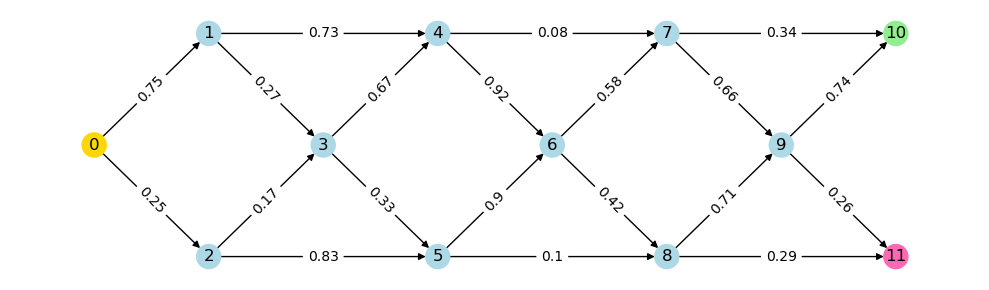

In [5]:
# DRAW 
plt.rcParams["figure.figsize"] = [10, 3]
nx.draw_networkx(DG1,
        pos=ps,               # Node positions
        node_color=ncols,
        font_color= 'k',      # For the nodes
        edge_color=ecols,
        with_labels=True,) 

nx.draw_networkx_edge_labels(DG1, pos=ps, edge_labels = edge_weight,)
plt.axis("off")               # Does not draw frames around                           
plt.show()

In [6]:
# NEIGHBORS OF EACH NODE (dictionary)
adj_dict = {0: (1,2), 1: (3,4), 2: (3,5),  3: (4,5),  4: (6,7),  5: (6,8),  6: (7,8),\
            7: (9,10),  8: (9,11),  9: (10,11),}
print(adj_dict[0])
print(adj_dict[0][0])
print(adj_dict[0][1])

(1, 2)
1
2


In [7]:
# RANDOM PATH from 0 to either 10 or 11.
# n0 = current node, n1 = smaller successor of n0,  n2 = larger successor of n0.
# p1 = Probability weight for edge (n0, n1)

pathnodes = [0]                     
n0 = 0                                       # Current node. Start from node 0
while n0 < 10:
    lot = rnd.random()             # Lottery number for which node will be continued
    print("lot:", round(lot,3))
    p1 = DG1[n0][adj_dict[n0][0]]['weight']  # Weight n0 to smaller successor node n1
    print("Lot to a smaller node <=",p1)
    n1 = adj_dict[n0][0]                     # n0's smaller successor node
    n2 = adj_dict[n0][1]                     # n0's larger successor node
    print("Current node n0 =", n0)
    print("Follower nodes: n1= ", n1, ", n2 =", n2)
# If the lottery happens to be below 'weight', we go to the successor node with a lower number, which is..
# ..the first (ie 0th) member of the dictionary value. If the draw is higher than the edge weight, let's go ..
# ..to the higher-numbered neighbor.
    if lot <= p1 :       
        print("Next node", n1)   
        pathnodes.append(n1)
        n0 = n1             # New 'current node'
    else: 
        print("Next node", n2)   
        pathnodes.append(n2)
        n0 = n2             # New 'current node'
    print("pathnodes:", pathnodes)
    print("n0 =", n0)
    print()
print("pathnodes:", pathnodes)
pathedges = []
for i in range(len(pathnodes)-1):
    pathedges.append((pathnodes[i], pathnodes[i+1]))
print("Pathedges:", pathedges)

lot: 0.841
Lot to a smaller node <= 0.75
Current node n0 = 0
Follower nodes: n1=  1 , n2 = 2
Next node 2
pathnodes: [0, 2]
n0 = 2

lot: 0.868
Lot to a smaller node <= 0.17
Current node n0 = 2
Follower nodes: n1=  3 , n2 = 5
Next node 5
pathnodes: [0, 2, 5]
n0 = 5

lot: 0.372
Lot to a smaller node <= 0.9
Current node n0 = 5
Follower nodes: n1=  6 , n2 = 8
Next node 6
pathnodes: [0, 2, 5, 6]
n0 = 6

lot: 0.619
Lot to a smaller node <= 0.58
Current node n0 = 6
Follower nodes: n1=  7 , n2 = 8
Next node 8
pathnodes: [0, 2, 5, 6, 8]
n0 = 8

lot: 0.411
Lot to a smaller node <= 0.71
Current node n0 = 8
Follower nodes: n1=  9 , n2 = 11
Next node 9
pathnodes: [0, 2, 5, 6, 8, 9]
n0 = 9

lot: 0.994
Lot to a smaller node <= 0.74
Current node n0 = 9
Follower nodes: n1=  10 , n2 = 11
Next node 11
pathnodes: [0, 2, 5, 6, 8, 9, 11]
n0 = 11

pathnodes: [0, 2, 5, 6, 8, 9, 11]
Pathedges: [(0, 2), (2, 5), (5, 6), (6, 8), (8, 9), (9, 11)]


In [8]:
# HIGHLIGHTING THE PATH with 'magenta' color and thickened edges

# Change the node colors of the path to magenta.
for pn in pathnodes:
    if  0 < pn and pn < 10 :
        DG1.nodes[pn]['color']='magenta'

# Change the edge colors of the path to magenta..
for pe in pathedges:
    DG1.edges[pe]['color'] = 'magenta' 

# Make the edges of the path thicker
for pew in pathedges:
    DG1.edges[pew]['width']=3 

# Let's extract the color lists and edge thicknesses of nodes and edges into dictionaries
ncols = nx.get_node_attributes(DG1, 'color').values()
ecols = nx.get_edge_attributes(DG1, 'color').values()
ewidth = nx.get_edge_attributes(DG1, 'width').values()


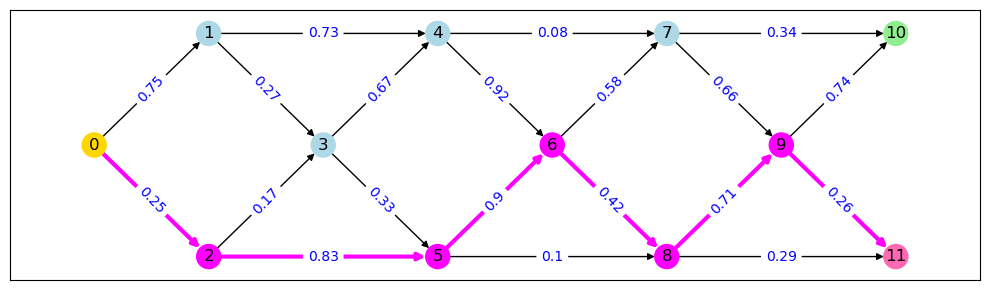

In [9]:
# DRAW  
# Try new runs:  Kernel --> Restart & Run All
plt.rcParams["figure.figsize"] = [10, 3]
nx.draw_networkx(DG1,
        pos=ps,
        node_color=ncols,
        font_color= 'k',      # For nodes
        edge_color=ecols,
        width=list(ewidth),
        with_labels=True,) 
       
nx.draw_networkx_edge_labels(DG1, pos=ps, edge_labels = edge_weight, font_color='b')
plt.show()
